In [2]:
import numpy as np
import pandas as pd

In [3]:
data = pd.read_csv("spam.csv", encoding="latin1")

In [4]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
data.shape

(5572, 5)

## Step - 1  Cleaning the dataset

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


# Remove the last 3 columns

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [8]:
data = data.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'] , axis=1)

# Renaming the columns

In [9]:
data = data.rename(columns={'v1': 'target', 'v2': 'message'}) #inplace = False

# Encoding the message

In [10]:
from sklearn.preprocessing import LabelEncoder
encode = LabelEncoder()

# # ham - 0, spam - 1

In [11]:
data['target'] = encode.fit_transform(data['target']) 

In [12]:
data.head()

,target,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


# Looking for any missing value in the data

In [13]:
data.isnull().sum()

target     0
message    0
dtype: int64

# Finding the duplicate value

In [14]:
data.duplicated().sum()

403

# remove the duplicate

In [15]:
data = data.drop_duplicates(keep='first')
data.duplicated().sum()

0

In [16]:
data.shape

(5169, 2)

## Step 2 : EDA - Exploratory Data Analysis 

# Finding the percentage of the data distribution

In [17]:
data['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

In [18]:
import matplotlib.pyplot as plt

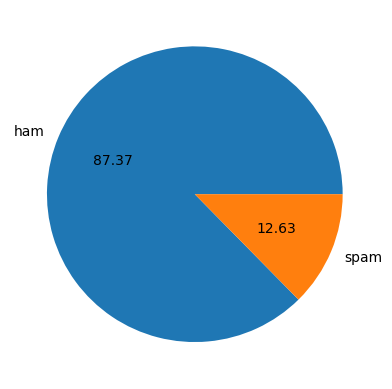

In [19]:
plt.pie(data['target'].value_counts(), labels=['ham', 'spam'], autopct="%0.2f")
plt.show()

In [20]:
# Data is imbalance


In [21]:
# add 3 more cols number count of words, chars and sentences in each message

In [22]:
import nltk  # natural language toolkit
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Paras\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Paras\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [23]:
data['number_characters'] = data['message'].apply(len) # length of the each message
# data['message'].apply(lambda x:nltk.word_tokenize(x)) -> return you the list of words
data['number_words'] = data['message'].apply(lambda x:len(nltk.word_tokenize(x)))
data['number_sentence'] = data['message'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [24]:
# describe the new columns of the data
data[['number_characters', 'number_words', 'number_sentence']].describe()

,number_characters,number_words,number_sentence
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [25]:
# describe the ham and spam differently of the data
data[data['target']==0][['number_characters', 'number_words', 'number_sentence']].describe()

,number_characters,number_words,number_sentence
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [26]:
# for the spam
data[data['target']==1][['number_characters', 'number_words', 'number_sentence']].describe()

,number_characters,number_words,number_sentence
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [27]:
# plot a histogram

import seaborn as sns
plt.figure(figsize=(12,6))  # size of the graph

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Axes: xlabel='number_characters', ylabel='Count'>

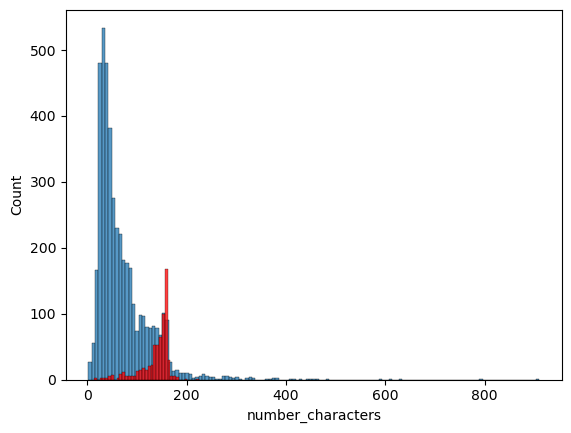

In [28]:
sns.histplot(data[data['target']==0]['number_characters']) # ham
sns.histplot(data[data['target']==1]['number_characters'], color='red')  # spam

<Axes: xlabel='number_words', ylabel='Count'>

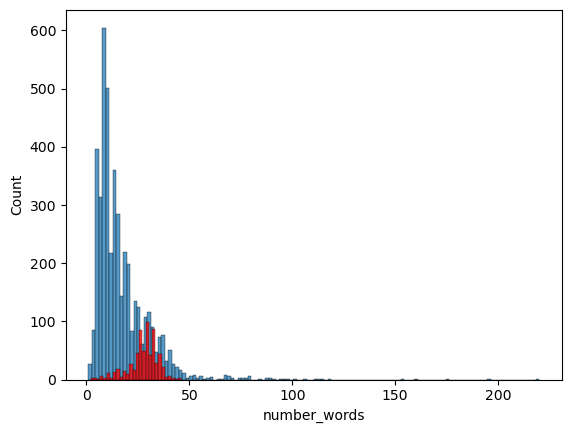

In [29]:
sns.histplot(data[data['target']==0]['number_words']) # ham
sns.histplot(data[data['target']==1]['number_words'], color='red')  # spam

# Lets see the relation between the columns based on the target 

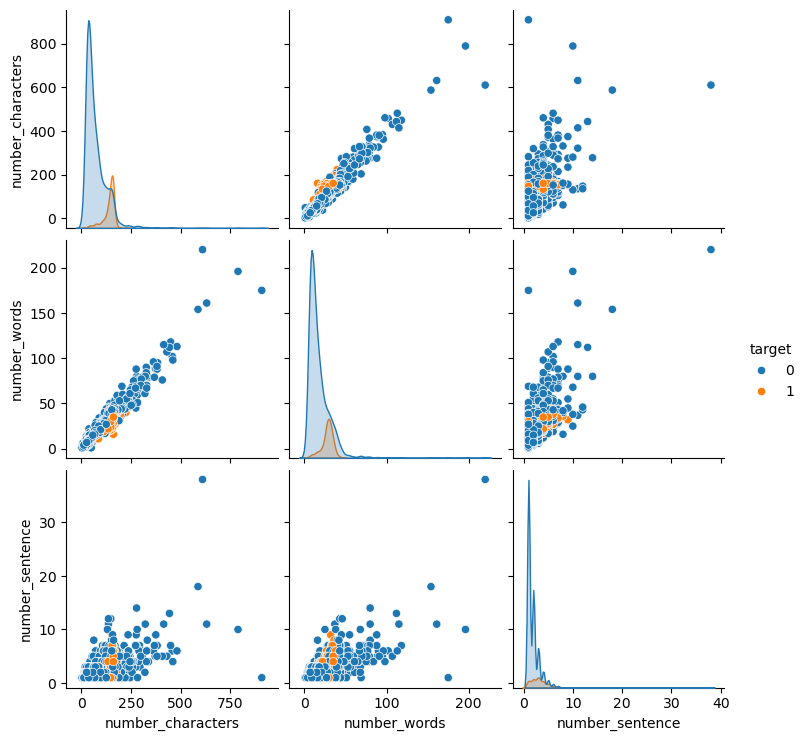

In [30]:
sns.pairplot(data, hue='target')

<Axes: >

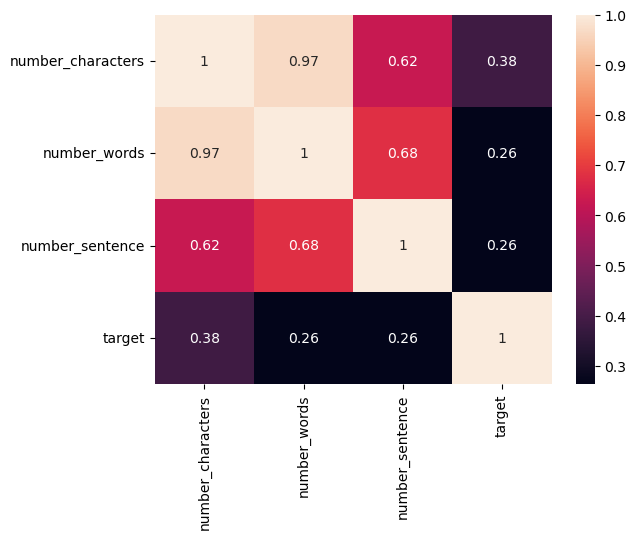

In [31]:
sns.heatmap(data[['number_characters', 'number_words', 'number_sentence', 'target']].corr(), annot=True)

# ['number_characters', 'number_words', 'number_sentence'] these columns have the high corelations so we can't use these all.
# So, we will select column that have the maximum co-relation with the target columns, that is 'number_characters'

## -------------------------------------------------------------------------------------

# Step 3: Data Preprocessing - for textual data

## 1. Lower case
## 2. Tokenization - means breaking into words
## 3. Remove special character
## 4. Removing the stop words and punctuation
## 5. Stemming - merging the similar meaning words together eg- dance, dancing

In [32]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Paras\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [33]:
# creating a new function that take a text input and perform all the function

from nltk.corpus import stopwords
import string  # get the puntuations
from nltk.stem.porter import PorterStemmer


ps = PorterStemmer()

def text_transform(text: str):
    text = text.lower()
    text = nltk.word_tokenize(text)
    y = []
    for i in text:
         if i.isalnum(): # filter a-z + A-Z + 0-9  , isalpha - filter  A-Z or a-z
             y.append(i)
    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    # converting the word into its root form
    for i in text:
        y.append(ps.stem(i))
    
    return " ".join(y)

In [34]:
print(text_transform("Hello!!! How are you??,, Thst is great.. loved, loving, dance, dancing"))

hello thst great love love danc danc


In [35]:
data['transform_text'] = data['message'].apply(text_transform)

In [36]:
data.head()

,target,message,number_characters,number_words,number_sentence,transform_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


# wordcloud is a library that show the most repeated messages in the various form of the sizes

In [37]:
from wordcloud import WordCloud
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')

In [38]:
spam_wc = wc.generate(data[data['target'] == 1]['transform_text'].str.cat(sep=" "))  # for the spam messages 

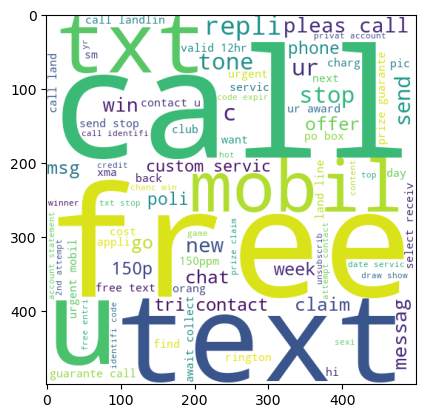

In [39]:
plt.imshow(spam_wc)

In [40]:
spam_wc = wc.generate(data[data['target'] == 0]['transform_text'].str.cat(sep=" "))  # for the ham messages 

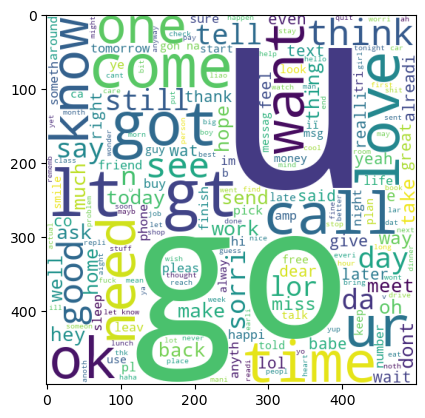

In [41]:
plt.imshow(spam_wc)

## Lets found out the exact 30 words or any number of the words in both the cases

In [42]:
spam_corpus = []
for msg in data[data['target']==1]['transform_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [43]:
# collections is a library Have Counter function which take a list of the repeting words and return dictionary key is word and value is its frequency

In [44]:
from collections import Counter
spam_corpus = Counter(spam_corpus)
len(spam_corpus)

2222

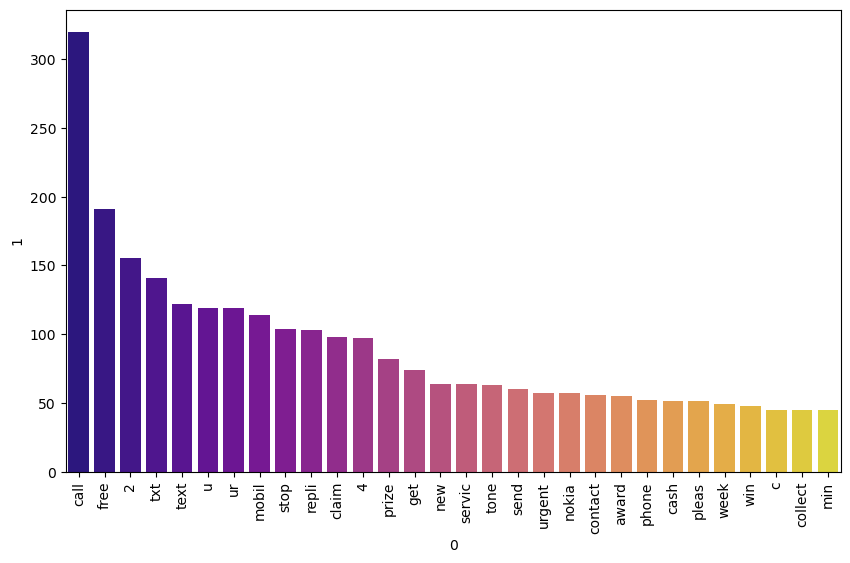

In [45]:
plt.figure(figsize=(10,6))
sns.barplot(x = pd.DataFrame(spam_corpus.most_common(30))[0], y =  pd.DataFrame(spam_corpus.most_common(30))[1], palette='plasma', hue=pd.DataFrame(spam_corpus.most_common(30))[0])
plt.xticks(rotation='vertical')
plt.show()

In [46]:
ham_corpus = []
for msg in data[data['target']==0]['transform_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

from collections import Counter
ham_corpus = Counter(ham_corpus)
len(ham_corpus)

5390

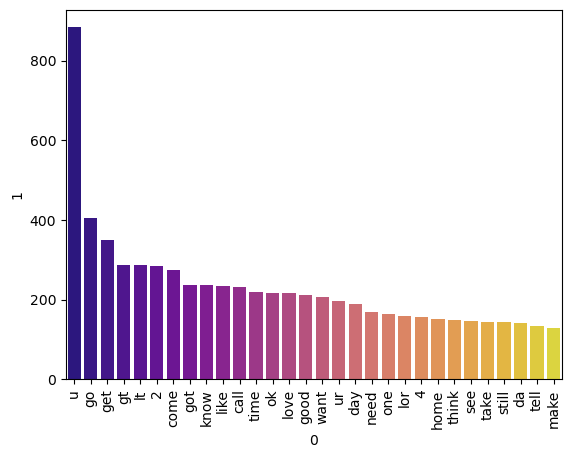

In [47]:
sns.barplot(x = pd.DataFrame(ham_corpus.most_common(30))[0], y =  pd.DataFrame(ham_corpus.most_common(30))[1], palette='plasma', hue=pd.DataFrame(ham_corpus.most_common(30))[0])
plt.xticks(rotation='vertical')
plt.show()

# Step 3.1 : - Model Creation with the CountVectorizer

## This imports CountVectorizer, a tool from scikit-learn used to convert text data into numerical feature vectors, which can be used in machine learning models.

In [48]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

x = cv.fit_transform(data['transform_text']).toarray()

In [49]:
x.shape

(5169, 6708)

In [50]:
y = data['target'].values

In [51]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=0)

In [52]:
y_train.shape

(4135,)

# Using the Gaussian Naive Bayes and some other model that is best for the text data 

In [53]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [54]:
gnb = GaussianNB()
mnb = MultinomialNB()
Bnb = BernoulliNB()

In [55]:
gnb.fit(x_train, y_train)
mnb.fit(x_train, y_train)
Bnb.fit(x_train, y_train)

BernoulliNB()

In [56]:
y_pred = gnb.predict(x_test)
print("Accuracy Score of Gaussian Model: ", accuracy_score(y_test, y_pred))
print("Confusion Matrix of Gaussian Model: ", confusion_matrix(y_test, y_pred))
print("Precision Score of Gaussian Model: ", precision_score(y_test, y_pred))

Accuracy Score of Gaussian Model:  0.8762088974854932
Confusion Matrix of Gaussian Model:  [[774 111]
 [ 17 132]]
Precision Score of Gaussian Model:  0.5432098765432098


In [57]:
y_pred = mnb.predict(x_test)
print("Accuracy Score of MultinomialNB Model: ", accuracy_score(y_test, y_pred))
print("Confusion Matrix of MultinomialNB Model: ", confusion_matrix(y_test, y_pred))
print("Precision Score of MultinomialNB Model: ", precision_score(y_test, y_pred))

Accuracy Score of MultinomialNB Model:  0.9709864603481625
Confusion Matrix of MultinomialNB Model:  [[869  16]
 [ 14 135]]
Precision Score of MultinomialNB Model:  0.8940397350993378


In [58]:
y_pred = Bnb.predict(x_test)
print("Accuracy Score of BernoulliNB Model: ", accuracy_score(y_test, y_pred))
print("Confusion Matrix of BernoulliNB Model: ", confusion_matrix(y_test, y_pred))
print("Precision Score of BernoulliNB Model: ", precision_score(y_test, y_pred))

Accuracy Score of BernoulliNB Model:  0.9661508704061895
Confusion Matrix of BernoulliNB Model:  [[881   4]
 [ 31 118]]
Precision Score of BernoulliNB Model:  0.9672131147540983


# Precision should be equal or approx 1 and the accuracy should also approches the 1

# So the BernoulliNB Model is looking correct

# Step 3.2 : Model Creation with the TfidfVectorizer

## It also do the same thing with some different method

In [59]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()  # max_features is a hyper parameter that you can use eg, let 1000 you will use only top 1000 words for prediction.. I am using all

x = tfidf.fit_transform(data['transform_text']).toarray()

In [60]:
y = data['target'].values

In [61]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=0)

In [62]:
gnb.fit(x_train, y_train)
mnb.fit(x_train, y_train)
Bnb.fit(x_train, y_train)

BernoulliNB()

In [63]:
y_pred = gnb.predict(x_test)
print("Accuracy Score of Gaussian Model: ", accuracy_score(y_test, y_pred))
print("Confusion Matrix of Gaussian Model: ", confusion_matrix(y_test, y_pred))
print("Precision Score of Gaussian Model: ", precision_score(y_test, y_pred))

Accuracy Score of Gaussian Model:  0.8713733075435203
Confusion Matrix of Gaussian Model:  [[774 111]
 [ 22 127]]
Precision Score of Gaussian Model:  0.5336134453781513


In [64]:
y_pred = mnb.predict(x_test)
print("Accuracy Score of MultinomialNB Model: ", accuracy_score(y_test, y_pred))
print("Confusion Matrix of MultinomialNB Model: ", confusion_matrix(y_test, y_pred))
print("Precision Score of MultinomialNB Model: ", precision_score(y_test, y_pred))

Accuracy Score of MultinomialNB Model:  0.9458413926499033
Confusion Matrix of MultinomialNB Model:  [[885   0]
 [ 56  93]]
Precision Score of MultinomialNB Model:  1.0


In [65]:
y_pred = Bnb.predict(x_test)
print("Accuracy Score of BernoulliNB Model: ", accuracy_score(y_test, y_pred))
print("Confusion Matrix of BernoulliNB Model: ", confusion_matrix(y_test, y_pred))
print("Precision Score of BernoulliNB Model: ", precision_score(y_test, y_pred))

Accuracy Score of BernoulliNB Model:  0.9661508704061895
Confusion Matrix of BernoulliNB Model:  [[881   4]
 [ 31 118]]
Precision Score of BernoulliNB Model:  0.9672131147540983


# Comparing the MultinomialNB Model of this time the previous selected BernoulliNB Model method is not that good.
# So, finally we use TfidfVectorizer and MultinomialNB Model

# --------------------------------------------------------------------------------------------------------------------------------

# Lets try Some other kind of the models too

In [66]:
# Importing all the models

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

# ExtraTreesClassifier is vatriation of the RandomForestClassifier that is even more random then random forest

In [67]:
# Making the ojects for all those models

svc = SVC(kernel='sigmoid')
knc = KNeighborsClassifier(n_neighbors=5)
dec = DecisionTreeClassifier(max_depth=5)
ran = RandomForestClassifier(n_estimators=60, random_state=0)
ada = AdaBoostClassifier(n_estimators=60, random_state=0)
log = LogisticRegression(solver='liblinear', penalty='l1')
bagg = BaggingClassifier(n_estimators=60, random_state=0)
ext = ExtraTreesClassifier(n_estimators=60, random_state=0)
gra = GradientBoostingClassifier(n_estimators=60, random_state=0)
xgb = XGBClassifier(n_estimators=60, random_state=0)

In [68]:
object_list = [svc, knc, dec, ran, ada, log, bagg, ext, gra, xgb]

In [69]:
accuracy_list = []
precision_list = []
model_name = ['SVC', 'KNN', 'Decision Tree', 'Random tree', 'Adaboost', 'LogisticRegression', 'Bagging', 'ExtraTree', 'GradientBoost', 'XGBoost']
def train_predict(obj, x_train, y_train, x_test, y_test):
    print("0")
    obj.fit(x_train, y_train)
    print("1")
    y_pred = obj.predict(x_test)
    print("2")
    accuracy = accuracy_score(y_test, y_pred)
    print("3")
    accuracy_list.append(accuracy)
    print("4")
    precision = precision_score(y_test, y_pred)
    print("5")
    precision_list.append(precision)
    print("6")
    

In [70]:
for i in object_list:
    print("kjg")
    train_predict(i, x_train, y_train, x_test, y_test)
    print(i)

kjg
0
1
2
3
4
5
6
SVC(kernel='sigmoid')
kjg
0
1
2
3
4
5
6
KNeighborsClassifier()
kjg
0
1
2
3
4
5
6
DecisionTreeClassifier(max_depth=5)
kjg
0
1
2
3
4
5
6
RandomForestClassifier(n_estimators=60, random_state=0)
kjg
0


C:\Users\Paras\New folder\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


1
2
3
4
5
6
AdaBoostClassifier(n_estimators=60, random_state=0)
kjg
0
1
2
3
4
5
6
LogisticRegression(penalty='l1', solver='liblinear')
kjg
0
1
2
3
4
5
6
BaggingClassifier(n_estimators=60, random_state=0)
kjg
0
1
2
3
4
5
6
ExtraTreesClassifier(n_estimators=60, random_state=0)
kjg
0
1
2
3
4
5
6
GradientBoostingClassifier(n_estimators=60, random_state=0)
kjg
0
1
2
3
4
5
6
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,

In [75]:
performance_data = pd.DataFrame({'Algorithm': model_name, 'Accuracy':accuracy_list, 'Precision':precision_list}).sort_values('Precision', ascending=False)

In [77]:
performance_data

,Algorithm,Accuracy,Precision
1,KNN,0.888781,1.000000
3,Random tree,0.972921,1.000000
7,ExtraTree,0.975822,1.000000
8,GradientBoost,0.960348,0.982143
9,XGBoost,0.971954,0.976190
0,SVC,0.969052,0.975610
5,LogisticRegression,0.956480,0.956140
4,Adaboost,0.962282,0.936508
6,Bagging,0.962282,0.881944
2,Decision Tree,0.932302,0.849558


# Now notice that from the last selected MultinomialNB Model ExExtraTreesClassifier have even best result..

# ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# Now Lets try to apply VOTING CLASSIFIER

## I Will use XGBoost, ExtraTreesClassifier and MultinomialNB Model

In [79]:
from sklearn.ensemble import VotingClassifier

voting = VotingClassifier(estimators=[('XGBoost', xgb), ('ExtraTreesClassifier', ext), ('MultinomialNB Model', mnb)])

voting.fit(x_train, y_train)
y_pred = voting.predict(x_test)

print("Votting Accuracy is: ", accuracy_score(y_test, y_pred))
print("Vottin Precision is: ", precision_score(y_test, y_pred))

Votting Accuracy is:  0.971953578336557
Vottin Precision is:  1.0


# Now Lets try to apply STACKING CLASSIFIER

## I Will use XGBoost, ExtraTreesClassifier and MultinomialNB Model

In [81]:
from sklearn.ensemble import StackingClassifier

estimators=[('XGBoost', xgb), ('ExtraTreesClassifier', ext), ('MultinomialNB Model', mnb)]
final_estimator = ran  # Random forest

stack = StackingClassifier(estimators=estimators, final_estimator=final_estimator)
stack.fit(x_train, y_train)
y_pred = stack.predict(x_test)

print("Stacking Accuracy is: ", accuracy_score(y_test, y_pred))
print("Stacking Precision is: ", precision_score(y_test, y_pred))

Stacking Accuracy is:  0.9835589941972921
Stacking Precision is:  0.9852941176470589


# In all the cases the accuracy and precision ExtraTreesClassifier have the higher and suitable values

In [82]:
# Now we use pickel to transport the data and deploy

In [84]:
import pickle
pickle.dump(tfidf, open('vectorizer.pkl', 'wb'))
pickle.dump(ext, open('model.pkl', 'wb'))